### EDA2

exploring new combination of features

In [1]:
import pandas as pd
import numpy as np

from utils import read_from_object_storage, compute_distinct

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# globals
# some columns are not needed. This is the list of columns that will be used
MY_COLUMNS = ['Age', 'Attrition', 'EnvironmentSatisfaction', 'MaritalStatus', 'TravelForWork', 'SalaryLevel', 'JobFunction', 
              'CommuteLength', 'EducationalLevel', 'EducationField', 'MonthlyIncome', 
              'OverTime', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'WorkLifeBalance']

### Reading the dataset from the Object Storage (using OCIFS)

In [3]:
PREFIX = "oci://data_input@fr95jjtqbdhh/"
FILE_NAME = "orcl_attrition.csv"

# see in functions above
data_orig = read_from_object_storage(prefix=PREFIX, file_name=FILE_NAME)

data_orig.head()

,Age,Attrition,TravelForWork,SalaryLevel,JobFunction,CommuteLength,EducationalLevel,EducationField,Directs,EmployeeNumber,...,WeeklyWorkedHours,StockOptionLevel,YearsinIndustry,TrainingTimesLastYear,WorkLifeBalance,YearsOnJob,YearsAtCurrentLevel,YearsSinceLastPromotion,YearsWithCurrManager,name
0,42,Yes,infrequent,5054,Product Management,2,L2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Tracy Moore
1,50,No,often,1278,Software Developer,9,L1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Andrew Hoover
2,38,Yes,infrequent,6296,Software Developer,3,L2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Julie Bell
3,34,No,often,6384,Software Developer,4,L4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Thomas Adams
4,28,No,infrequent,2710,Software Developer,3,L1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Johnathan Burnett


In [4]:
data_orig.columns

Index(['Age', 'Attrition', 'TravelForWork', 'SalaryLevel', 'JobFunction',
       'CommuteLength', 'EducationalLevel', 'EducationField', 'Directs',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'WeeklyWorkedHours', 'StockOptionLevel',
       'YearsinIndustry', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsOnJob', 'YearsAtCurrentLevel', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'name'],
      dtype='object')

In [5]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   TravelForWork             1470 non-null   object
 3   SalaryLevel               1470 non-null   int64 
 4   JobFunction               1470 non-null   object
 5   CommuteLength             1470 non-null   int64 
 6   EducationalLevel          1470 non-null   object
 7   EducationField            1470 non-null   object
 8   Directs                   1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# eliminiamo 
to_remove = ['Directs', 'EmployeeNumber', 'name', 'Over18', 'WeeklyWorkedHours']

columns1 = sorted(list(set(data_orig.columns) - set(to_remove)))

print('Rimangono:', len(columns1))

Rimangono: 31


In [8]:
data1 = data_orig[columns1]

In [9]:
# cross correlation matrix
tab1 = data1.corr()

tab1

,Age,CommuteLength,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,RelationshipSatisfaction,SalaryLevel,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCurrentLevel,YearsOnJob,YearsSinceLastPromotion,YearsWithCurrManager,YearsinIndustry
Age,1.000000,-0.001686,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,...,0.053535,0.010661,0.037510,-0.019621,-0.021490,0.212901,0.311309,0.216513,0.202089,0.680381
CommuteLength,-0.001686,1.000000,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,...,0.006557,-0.004994,0.044872,-0.036942,-0.026556,0.018845,0.009508,0.010029,0.014406,0.004628
EnvironmentSatisfaction,0.010146,-0.016075,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,...,0.007665,0.018355,0.003432,-0.019359,0.027627,0.018007,0.001458,0.016194,-0.004999,-0.002693
HourlyRate,0.024287,0.031131,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,...,0.001330,0.023373,0.050263,-0.008548,-0.004607,-0.024106,-0.019582,-0.026716,-0.020123,-0.002334
JobInvolvement,0.029820,0.008783,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,...,0.034297,0.046128,0.021523,-0.015338,-0.014617,0.008717,-0.021355,-0.024184,0.025976,-0.005533
JobLevel,0.509604,0.005303,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,...,0.021642,0.002969,0.013984,-0.018191,0.037818,0.389447,0.534739,0.353885,0.375281,0.782208
JobSatisfaction,-0.004892,-0.003669,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,...,-0.012454,0.030568,0.010690,-0.005779,-0.019459,-0.002305,-0.003803,-0.018214,-0.027656,-0.020185
MonthlyIncome,0.497855,-0.017014,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,...,0.025873,0.007709,0.005408,-0.021736,0.030683,0.363818,0.514285,0.344978,0.344079,0.772893
MonthlyRate,0.028051,0.027473,0.037600,-0.015297,-0.016322,0.039563,0.000644,0.034814,1.000000,0.017521,...,-0.004085,-0.032184,-0.034323,0.001467,0.007963,-0.012815,-0.023655,0.001567,-0.036746,0.026442
NumCompaniesWorked,0.299635,-0.029251,0.012594,0.022157,0.015012,0.142501,-0.055699,0.149515,0.017521,1.000000,...,0.052733,0.038141,0.030075,-0.066054,-0.008366,-0.090754,-0.118421,-0.036814,-0.110319,0.237639


In [10]:
# provo a fare ricerca in automatico
THR = 0.7

for col in tab1.columns:
    print('********')
    print('Esamino:', col)
    cond = (tab1[col] > THR)
    
    print(tab1.loc[cond, col])
    print()

********
Esamino: Age
Age    1.0
Name: Age, dtype: float64

********
Esamino: CommuteLength
CommuteLength    1.0
Name: CommuteLength, dtype: float64

********
Esamino: EnvironmentSatisfaction
EnvironmentSatisfaction    1.0
Name: EnvironmentSatisfaction, dtype: float64

********
Esamino: HourlyRate
HourlyRate    1.0
Name: HourlyRate, dtype: float64

********
Esamino: JobInvolvement
JobInvolvement    1.0
Name: JobInvolvement, dtype: float64

********
Esamino: JobLevel
JobLevel           1.000000
MonthlyIncome      0.950300
YearsinIndustry    0.782208
Name: JobLevel, dtype: float64

********
Esamino: JobSatisfaction
JobSatisfaction    1.0
Name: JobSatisfaction, dtype: float64

********
Esamino: MonthlyIncome
JobLevel           0.950300
MonthlyIncome      1.000000
YearsinIndustry    0.772893
Name: MonthlyIncome, dtype: float64

********
Esamino: MonthlyRate
MonthlyRate    1.0
Name: MonthlyRate, dtype: float64

********
Esamino: NumCompaniesWorked
NumCompaniesWorked    1.0
Name: NumCompanie

In [11]:
to_remove = to_remove + ['JobLevel', 'YearsinIndustry','YearsOnJob','YearsWithCurrManager', 'PercentSalaryHike']

to_remove

columns2 = sorted(list(set(data_orig.columns) - set(to_remove)))

print('Rimangono:', len(columns2))

Rimangono: 26


In [12]:
data2 = data_orig[columns2]

tab2 = data2.corr()

for col in tab2.columns:
    print('********')
    print('Esamino:', col)
    cond = (tab2[col] > THR)
    
    print(tab2.loc[cond, col])
    print()

********
Esamino: Age
Age    1.0
Name: Age, dtype: float64

********
Esamino: CommuteLength
CommuteLength    1.0
Name: CommuteLength, dtype: float64

********
Esamino: EnvironmentSatisfaction
EnvironmentSatisfaction    1.0
Name: EnvironmentSatisfaction, dtype: float64

********
Esamino: HourlyRate
HourlyRate    1.0
Name: HourlyRate, dtype: float64

********
Esamino: JobInvolvement
JobInvolvement    1.0
Name: JobInvolvement, dtype: float64

********
Esamino: JobSatisfaction
JobSatisfaction    1.0
Name: JobSatisfaction, dtype: float64

********
Esamino: MonthlyIncome
MonthlyIncome    1.0
Name: MonthlyIncome, dtype: float64

********
Esamino: MonthlyRate
MonthlyRate    1.0
Name: MonthlyRate, dtype: float64

********
Esamino: NumCompaniesWorked
NumCompaniesWorked    1.0
Name: NumCompaniesWorked, dtype: float64

********
Esamino: PerformanceRating
PerformanceRating    1.0
Name: PerformanceRating, dtype: float64

********
Esamino: RelationshipSatisfaction
RelationshipSatisfaction    1.0
Name

In [13]:
data = data_orig[columns2]

In [14]:
print("Numero di record nel dataset intero:", data.shape[0])

Numero di record nel dataset intero: 1470


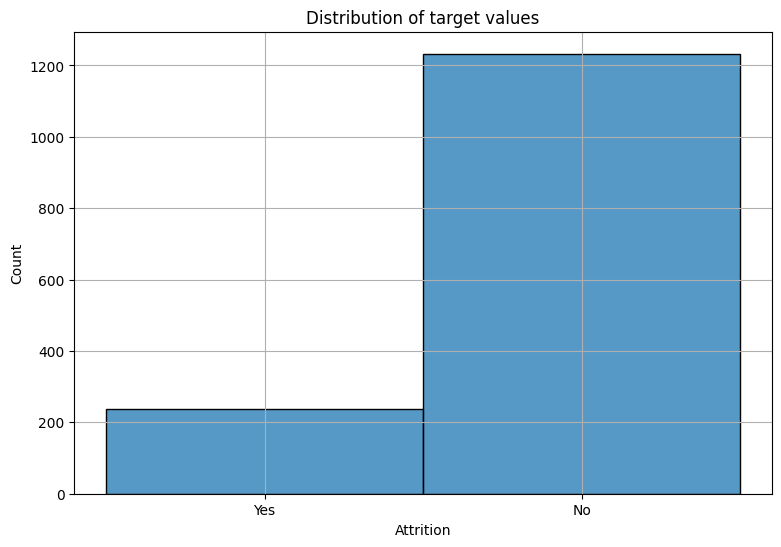

In [15]:
# distribution of target
FIGSIZE = (9, 6)
plt.figure(figsize=FIGSIZE)
plt.title('Distribution of target values')
plt.grid(True)
sns.histplot(data['Attrition'])
plt.show()

#### il dataset è sbilanciato, la classe positiva è minoritaria

In [16]:
# compute the ratio, for class weights
condition = data['Attrition'] == 'Yes'

n_pos = data.loc[condition].shape[0]
n_neg = data.shape[0] - n_pos
ratio = n_neg/n_pos

print('Il rapporto negativi/positivi è:', round(ratio, 2))

Il rapporto negativi/positivi è: 5.2


In [17]:
# contiamo il numero di valori distinti
# per decidere quali trattare come categoriche e quali come numeriche
count_df = compute_distinct(data, columns2)

count_df

,col,count
0,Age,43
1,Attrition,2
2,CommuteLength,29
3,EducationField,6
4,EducationalLevel,5
5,EnvironmentSatisfaction,4
6,Gender,2
7,HourlyRate,71
8,JobFunction,3
9,JobInvolvement,4


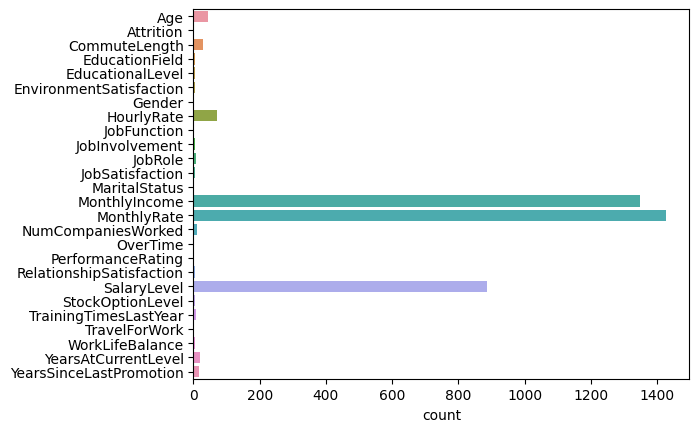

In [18]:
sns.barplot(y=columns2, x=count_df['count'])
plt.show()

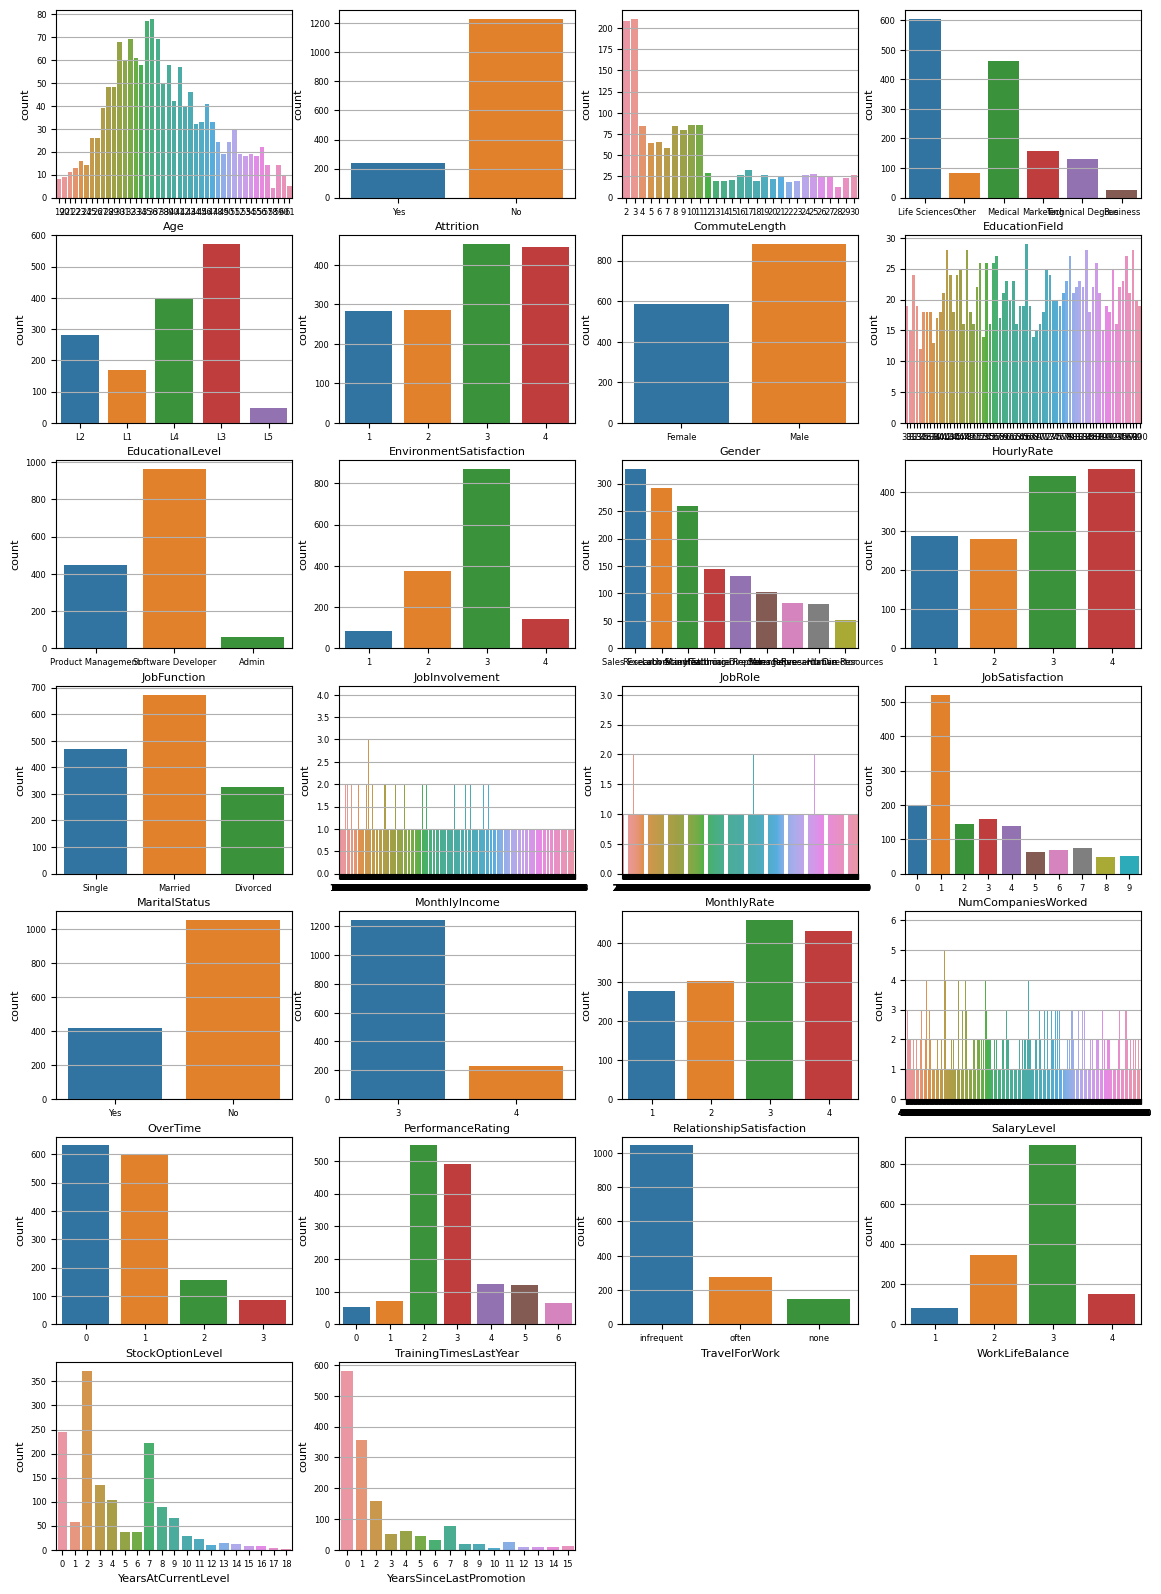

In [19]:
FIGSIZE = (14, 20)
plt.figure(figsize=FIGSIZE)

# iterasu tutte le colonne
for i, col in enumerate(columns2):
    plt.subplot(7, 4, i+1)
    plt.grid(True)
    cp = sns.countplot(x=data[col])
    cp.set_xlabel(col,fontsize=8)
    cp.set_ylabel('count',fontsize=8)
    cp.tick_params(labelsize=6)
plt.show()

#### Dalle analisi sopra si giustifica di considerare **MonthlyIncome**, **MonthlyRate**  e **SalaryLevel** come continue numeriche e tutte le altre come categoriche

In [20]:
columns2

['Age',
 'Attrition',
 'CommuteLength',
 'EducationField',
 'EducationalLevel',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobFunction',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'SalaryLevel',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'TravelForWork',
 'WorkLifeBalance',
 'YearsAtCurrentLevel',
 'YearsSinceLastPromotion']